In [98]:
# Importing Modules
import pandas as pd
from bs4 import BeautifulSoup
import requests
from urllib.parse import urljoin
url = 'https://www.jumia.co.ke/phones-tablets/all-products/#catalog-listing' 
links = []

# Extracting links from both pages

while True:
    links.append(url)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    next_page = soup.find('a',{'class':'pg', 'aria-label':'Next Page'})
    if next_page:
        next_url = next_page.get('href')
        url = urljoin(url,next_url)
    else:
        break

# Checking if the links from 2 pages have been added to the list
print(links)

details_list = []

# Scraping data from the 2 pages
for url in links:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    details = soup.find_all('div', class_ = 'info')
    footers  = soup.find_all('footer', class_ = 'ft')
    
    for detail,footer in zip(details,footers):
        name = detail.find('h3', class_ = 'name').text.strip()
        price =  detail.find('div', class_ = 'prc').text.strip()
        try:
            old_price = detail.find('div', class_ = 'old').text.strip()
        except:
            old_price = " "
        try:
            discount = detail.find('div', class_ = 'bdg _dsct _sm').text.strip()
        except:
            discount = " "
        try:
            stars_reviews = detail.find('div', class_ = 'rev').text.strip()
        except:
            stars_reviews = " "
    
        try:
            items_left = footer.find('div', class_ = 'stk').text.strip()
        except:
            items_left = " Out of stock"
            
            
    
        details_dict = {'Name':name,'Price':price,'Old Price':old_price,'discount':discount,'Stars and Reviews':stars_reviews,'Items Left':items_left}
        details_list.append(details_dict)
        
phones_tablets_data = pd.DataFrame(details_list)
phones_tablets_data.head()

['https://www.jumia.co.ke/phones-tablets/all-products/#catalog-listing', 'https://www.jumia.co.ke/phones-tablets/all-products/?page=2#catalog-listing', 'https://www.jumia.co.ke/phones-tablets/all-products/?page=3#catalog-listing', 'https://www.jumia.co.ke/phones-tablets/all-products/?page=4#catalog-listing', 'https://www.jumia.co.ke/phones-tablets/all-products/?page=5#catalog-listing', 'https://www.jumia.co.ke/phones-tablets/all-products/?page=6#catalog-listing', 'https://www.jumia.co.ke/phones-tablets/all-products/?page=7#catalog-listing', 'https://www.jumia.co.ke/phones-tablets/all-products/?page=8#catalog-listing', 'https://www.jumia.co.ke/phones-tablets/all-products/?page=9#catalog-listing', 'https://www.jumia.co.ke/phones-tablets/all-products/?page=10#catalog-listing', 'https://www.jumia.co.ke/phones-tablets/all-products/?page=11#catalog-listing', 'https://www.jumia.co.ke/phones-tablets/all-products/?page=12#catalog-listing', 'https://www.jumia.co.ke/phones-tablets/all-products/?p

,Name,Price,Old Price,discount,Stars and Reviews,Items Left
0,RichRipple Pro3 Bluetooth Headsets Wireless Po...,KSh 465,KSh 754,38%,4 out of 5(560),Out of stock
1,RichRipple LED Display Bluetooth Headsets 9D S...,KSh 465,KSh 920,49%,3.7 out of 5(1002),Out of stock
2,RichRipple Pro3 Bluetooth Headsets Wireless Po...,KSh 465,KSh 826,44%,3.9 out of 5(493),Out of stock
3,"XIAOMI Redmi A3, 6.71"", 4GB RAM +128GB (Dual S...","KSh 9,999","KSh 11,500",13%,4.3 out of 5(55),Out of stock
4,Ace Elec ACEELEC F9 Wireless Fingerprint Touch...,KSh 395,KSh 790,50%,3.8 out of 5(904),Out of stock


In [100]:
phones_tablets_data.shape

(2000, 6)

## store Scraped data into a database

In [102]:
import sqlite3

# connct to as SQLite database
conn = sqlite3.connect('phones_tablets_data.db')

# Create a cursor object
cursor = conn.cursor()

# Create a table
cursor.execute(
    '''
    CREATE TABLE IF NOT EXISTS phones_tablets(
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT,
    price TEXT,
    old_price,
    discount TEXT,
    stars_review TEXT,
    items_out TEXT
    )
    '''
)

# Insert data into a the SQLite table
for _, row in phones_tablets_data.iterrows():
    cursor.execute(
        '''
        INSERT INTO phones_tablets (name, price, old_price, discount, stars_review, items_out)
        VALUES (?, ?, ?, ?, ?, ?)
        ''', (row['Name'], row['Price'], row['Old Price'], row['discount'], row['Stars and Reviews'], row['Items Left'])
    )

# Commit the transaction
conn.commit()

# Close the connection
conn.close()

# Confirmation message
print("Data has been successfully stored in a database")

Data has been successfully stored in a database


## Perform Exploratory Data Analysis(EDA)

In [104]:
# Load Data from SQLite Database
import sqlite3
import pandas as pd

# Connect to the SQlite database
conn = sqlite3.connect('phones_tablets_data.db')

# Load data from the database into a DataFrame
phones_tablets_data = pd.read_sql_query("SELECT * FROM phones_tablets", conn)

# Close the connection
conn.close()

# Inspect the first few rows
print(phones_tablets_data.head())

   id                                               name      price  \
0   1  RichRipple Pro3 Bluetooth Headsets Wireless Po...    KSh 465   
1   2  RichRipple LED Display Bluetooth Headsets 9D S...    KSh 465   
2   3  RichRipple Pro3 Bluetooth Headsets Wireless Po...    KSh 465   
3   4  XIAOMI Redmi A3, 6.71", 4GB RAM +128GB (Dual S...  KSh 9,999   
4   5  Ace Elec ACEELEC F9 Wireless Fingerprint Touch...    KSh 395   

    old_price discount        stars_review      items_out  
0     KSh 754      38%     4 out of 5(554)   Out of stock  
1     KSh 920      49%  3.7 out of 5(1000)   Out of stock  
2     KSh 826      44%   3.9 out of 5(490)   Out of stock  
3  KSh 11,500      13%    4.3 out of 5(55)   Out of stock  
4     KSh 790      50%   3.8 out of 5(897)   Out of stock  


## Perform Basic Data Checks

### 1. Check for missing values:

In [106]:
print(phones_tablets_data.isnull().sum())

id              0
name            0
price           0
old_price       0
discount        0
stars_review    0
items_out       0
dtype: int64


### 2. Check data types:

In [108]:
print(phones_tablets_data.dtypes)

id               int64
name            object
price           object
old_price       object
discount        object
stars_review    object
items_out       object
dtype: object


 ## 3. Check basic statistics

In [110]:
phones_tablets_data.describe()

,id
count,4000.000000
mean,2000.500000
std,1154.844867
min,1.000000
25%,1000.750000
50%,2000.500000
75%,3000.250000
max,4000.000000


In [112]:
phones_tablets_data.info

<bound method DataFrame.info of         id                                               name      price  \
0        1  RichRipple Pro3 Bluetooth Headsets Wireless Po...    KSh 465   
1        2  RichRipple LED Display Bluetooth Headsets 9D S...    KSh 465   
2        3  RichRipple Pro3 Bluetooth Headsets Wireless Po...    KSh 465   
3        4  XIAOMI Redmi A3, 6.71", 4GB RAM +128GB (Dual S...  KSh 9,999   
4        5  Ace Elec ACEELEC F9 Wireless Fingerprint Touch...    KSh 395   
...    ...                                                ...        ...   
3995  3996  Itel A18s 5.0" 32GB ROM + Up To 4GB RAM, 5MP, ...  KSh 6,599   
3996  3997  Samsung For Samsung Galaxy A11/M11 Case, Retro...    KSh 999   
3997  3998  Oraimo OraimoWatch 2 Pro Smart Watch Magnetic ...    KSh 685   
3998  3999  Bontel , Wireless Desktop Phone, And Office/FR...  KSh 3,800   
3999  4000  Touch Control Wireless Bluetooth Earphones, Mi...    KSh 520   

       old_price discount        stars_review      item

In [114]:
phones_tablets_data.tail()

,id,name,price,old_price,discount,stars_review,items_out
3995,3996,"Itel A18s 5.0"" 32GB ROM + Up To 4GB RAM, 5MP, ...","KSh 6,599","KSh 10,000",34%,,Out of stock
3996,3997,"Samsung For Samsung Galaxy A11/M11 Case, Retro...",KSh 999,"KSh 1,427",30%,,Out of stock
3997,3998,Oraimo OraimoWatch 2 Pro Smart Watch Magnetic ...,KSh 685,"KSh 1,300",47%,,Out of stock
3998,3999,"Bontel , Wireless Desktop Phone, And Office/FR...","KSh 3,800","KSh 4,500",16%,5 out of 5(1),Out of stock
3999,4000,"Touch Control Wireless Bluetooth Earphones, Mi...",KSh 520,,,5 out of 5(1),Out of stock


## 4. Data Cleaning and Inspection

In [120]:
phones_tablets_data.head()

,id,name,price,old_price,discount,stars_review,items_out
0,1,RichRipple Pro3 Bluetooth Headsets Wireless Po...,465.0,754.0,38%,4 out of 5(554),Out of stock
1,2,RichRipple LED Display Bluetooth Headsets 9D S...,465.0,920.0,49%,3.7 out of 5(1000),Out of stock
2,3,RichRipple Pro3 Bluetooth Headsets Wireless Po...,465.0,826.0,44%,3.9 out of 5(490),Out of stock
3,4,"XIAOMI Redmi A3, 6.71"", 4GB RAM +128GB (Dual S...",9999.0,11500.0,13%,4.3 out of 5(55),Out of stock
4,5,Ace Elec ACEELEC F9 Wireless Fingerprint Touch...,395.0,790.0,50%,3.8 out of 5(897),Out of stock


In [126]:
phones_tablets_data.tail(100)

,id,name,price,old_price,discount,stars_review,items_out
3900,3901,"Samsung Galaxy S10 6.1"" 128GB ROM + 8GB RAM - ...",39000.0,NaN,,,Out of stock
3901,3902,OPPO A3S Refurbished 64GB + 4GB RAM 6.2-inc...,8800.0,13800.0,36%,,Out of stock
3902,3903,"Itel It 2160, 1.77'' (Mpesa Phone) KABAMBE PH...",1899.0,2000.0,5%,5 out of 5(2),Out of stock
3903,3904,Smart OS - 128-EGGS DC / AC CONVERTER AUTOMATI...,18549.0,22200.0,16%,5 out of 5(2),Out of stock
3904,3905,"Air Pro 3 Wireless Bluetooth Pods,Wireless - W...",1794.0,3399.0,47%,3 out of 5(2),Out of stock
...,...,...,...,...,...,...,...
3995,3996,"Itel A18s 5.0"" 32GB ROM + Up To 4GB RAM, 5MP, ...",6599.0,10000.0,34%,,Out of stock
3996,3997,"Samsung For Samsung Galaxy A11/M11 Case, Retro...",999.0,1427.0,30%,,Out of stock
3997,3998,Oraimo OraimoWatch 2 Pro Smart Watch Magnetic ...,685.0,1300.0,47%,,Out of stock
3998,3999,"Bontel , Wireless Desktop Phone, And Office/FR...",3800.0,4500.0,16%,5 out of 5(1),Out of stock


In [128]:
phones_tablets_data.describe() # summary statistis for numerical columns

,id,price,old_price
count,4000.000000,4000.00000,3612.000000
mean,2000.500000,8766.65800,12862.595653
std,1154.844867,15595.80517,17678.554291
min,1.000000,20.00000,107.000000
25%,1000.750000,745.00000,1200.000000
50%,2000.500000,2097.50000,3651.000000
75%,3000.250000,13199.00000,20000.000000
max,4000.000000,189999.00000,260000.000000


In [136]:
#Check the column names
print(phones_tablets_data.columns)

Index(['id', 'name', 'price', 'old_price', 'discount', 'stars_review',
       'items_out'],
      dtype='object')


In [156]:
print(phones_tablets_data.rename(columns={'id':'No','name':'Name','price':'Price','old_price':'Old Price', 'discount':'Discount', 'stars_review':'Stars Review', 'items_out': 'Items Left'}, inplace=True))

None


In [158]:
phones_tablets_data.head()

,No,Name,Price,Old Price,Discount,Stars Review,Items Left
0,1,RichRipple Pro3 Bluetooth Headsets Wireless Po...,465.0,754.0,38%,4 out of 5(554),Out of stock
1,2,RichRipple LED Display Bluetooth Headsets 9D S...,465.0,920.0,49%,3.7 out of 5(1000),Out of stock
2,3,RichRipple Pro3 Bluetooth Headsets Wireless Po...,465.0,826.0,44%,3.9 out of 5(490),Out of stock
3,4,"XIAOMI Redmi A3, 6.71"", 4GB RAM +128GB (Dual S...",9999.0,11500.0,13%,4.3 out of 5(55),Out of stock
4,5,Ace Elec ACEELEC F9 Wireless Fingerprint Touch...,395.0,790.0,50%,3.8 out of 5(897),Out of stock


In [146]:
# Check data types after cleaning
phones_tablets_data.dtypes

No                int64
Name             object
Price           float64
Old Price       float64
Discount         object
Stars Review     object
Items Left       object
dtype: object

In [168]:
# Count unique values in a categorical columns
print(phones_tablets_data['Stars Review'].value_counts())
print(phones_tablets_data['Items Left'].value_counts())

Stars Review
                    898
5 out of 5(1)       337
5 out of 5(2)       128
4.5 out of 5(2)      71
4 out of 5(1)        65
                   ... 
3.3 out of 5(66)      1
4.4 out of 5(17)      1
3.7 out of 5(43)      1
3.9 out of 5(21)      1
4.4 out of 5(15)      1
Name: count, Length: 599, dtype: int64
Items Left
 Out of stock    4000
Name: count, dtype: int64


## 5. Data Visualization

#### Visualize the distribution of price

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


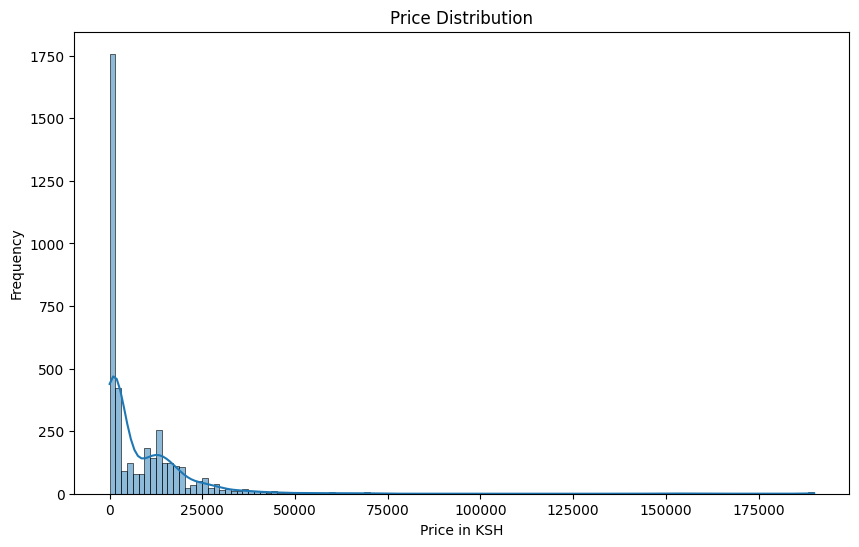

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(phones_tablets_data['Price'], kde = True)
plt.title('Price Distribution')
plt.xlabel('Price in KSH')
plt.ylabel('Frequency')
plt.show()

####  Discount Distribution

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


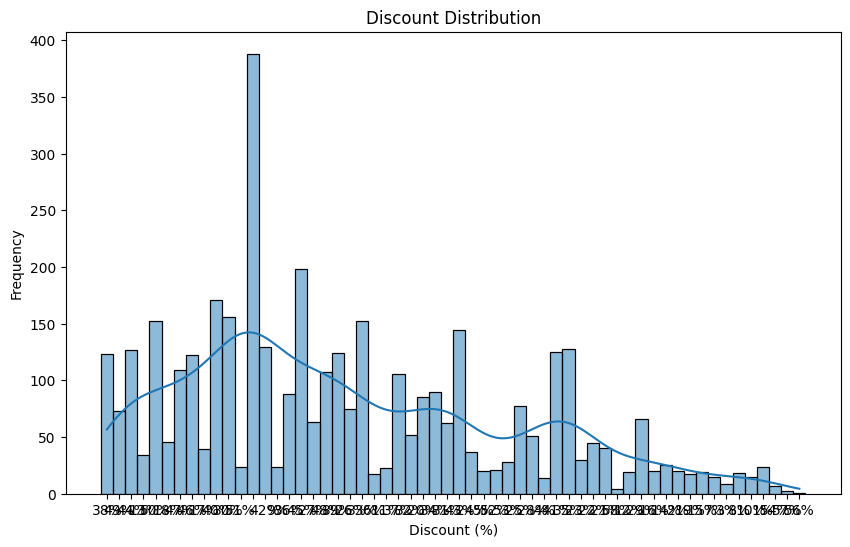

In [178]:
plt.figure(figsize=(10, 6))
sns.histplot(phones_tablets_data['Discount'], kde=True)
plt.title('Discount Distribution')
plt.xlabel('Discount (%)')
plt.ylabel('Frequency')
plt.show()


#### Visualize Price and Discount scatterplot

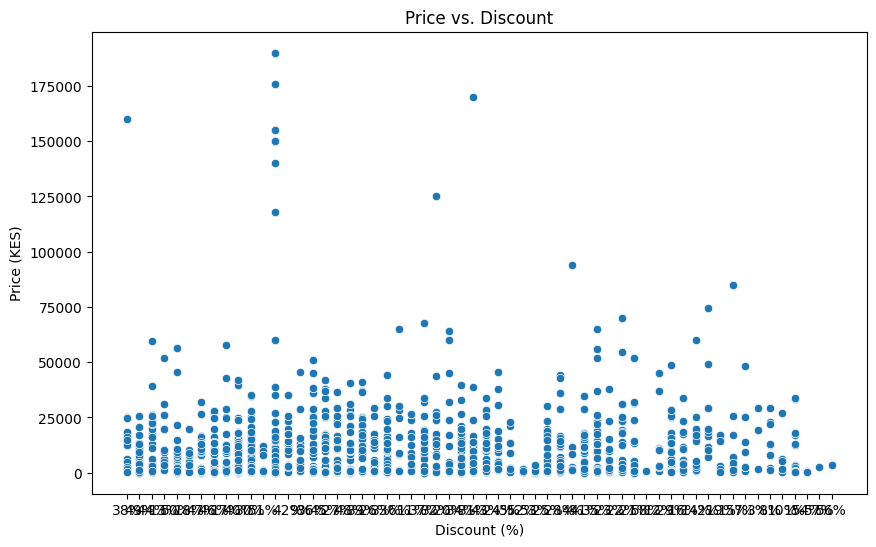

In [181]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Price', data=phones_tablets_data)
plt.title('Price vs. Discount')
plt.xlabel('Discount (%)')
plt.ylabel('Price (KSH)')
plt.show()